In [77]:
import pefile
import os.path
from os import scandir, getcwd
import pefile
import os
import shutil
from os import listdir
from os.path import isfile, join
import shutil
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score
import numpy as np

In [3]:
pe = pefile.PE("./MALWR/1F2EB7B090018D975E6D9B40868C94CA")

In [5]:
for section in pe.sections:
    var = section.Name, hex(section.VirtualAddress), hex(section.Misc_VirtualSize), section.SizeOfRawData

for entry in pe.DIRECTORY_ENTRY_IMPORT:
    var2 = entry.dll
    print (var2)
    for function in entry.imports:
        var3 = function.name
        print ('\t', var3)

print("TimeDateStamp : " + pe.FILE_HEADER.dump_dict()['TimeDateStamp']['Value'].split('[')[1][:-1])
print("TimeDateStamp: "+hex(pe.FILE_HEADER.TimeDateStamp))

b'KERNEL32.DLL'
	 b'LoadLibraryA'
	 b'ExitProcess'
	 b'GetProcAddress'
	 b'VirtualProtect'
b'MSVCRT.dll'
	 b'atol'
b'USER32.dll'
	 b'LoadStringA'
b'WS2_32.dll'
	 b'send'
TimeDateStamp : Fri Jan 15 17:20:56 2010 UTC
TimeDateStamp: 0x4b50a3f8


In [7]:
def ls(ruta = getcwd()):
    return [arch.name for arch in scandir(ruta) if arch.is_file()]

In [11]:
name = []
description = []

In [18]:
malwr_file_names = [f for f in listdir("MALWR") if isfile(
    join("MALWR", f)) if f != ".DS_Store"]

In [21]:
for file_name in malwr_file_names:
    target_file_name = file_name+""
    pe = pefile.PE("MALWR/"+file_name)
    needs_unpack = False
    for section in pe.sections:
        if "UPX" in section.Name.decode(errors='replace',):
            needs_unpack = True
    if needs_unpack:
        target_file_name += "_unpacked"
        os.system("upx -d " + "MALWR/"+file_name)

    original = "MALWR/"+file_name
    target = "MALWARE/"+target_file_name
    shutil.copyfile(original, target)

sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found
sh: 1: upx: not found


In [23]:
clean_file_names = [f for f in listdir("MALWARE") if isfile(
    join("MALWARE", f)) if f != ".DS_Store"]

In [25]:
malwares = ls("./MALWARE/")

In [26]:
malwares

['GBV66_8F259BB36E00D124963CFA9B86F502E',
 '99A39866A657A10949FCB6D634BB30D5_unpacked',
 'L11_1415EB8519D13328091CC5C76A624E3D_unpacked',
 '8442AE37B91F279A9F06DE4C60B286A3_unpacked',
 'NV99_C9C9DBF388A8D81D8CFB4D3FC05F8E4',
 'GFT4_7DDD3D72EAD03C7518F5D47650C8572',
 'A316D5AECA269CA865077E7FFF356E7D_unpacked',
 'VC990_468FF2C12CFFC7E5B2FE0EE6BB3B239E_unpacked',
 'FGTR43_EF8E0FB20E7228C7492CCDC59D87C690_unpacked',
 'KLp90_6D5C8FC4B14559F73B6136D85B94198',
 'DS22_A670D13D4D014169C4080328B8FEB86',
 'NBV_8B75BCBFF174C25A0161F30758509A44_unpacked',
 'B98hX8E8622C393D7E832D39E620EAD5D3B49_unpacked',
 'JKK8CA6FE7A1315AF5AFEAC2961460A80569_unpacked',
 'RTC_7F85D7F628CE62D1D8F7B39D8940472_unpacked',
 'PL98_BD8B082B7711BC980252F988BB0CA936_unpacked',
 'JH78C0A33A1B472A8C16123FD696A5CE5EBB_unpacked',
 '33DE5067A433A6EC5C328067DC18EC37_unpacked',
 'FTTR9EA3C16194CE354C244C1B74C46CD92E_unpacked',
 'AL65_DB05DF0498B59B42A8E493CF3C10C578_unpacked',
 '1F2EB7B090018D975E6D9B40868C94CA_unpacked',
 'BVJ2

In [27]:
for i in malwares:
    pe = pefile.PE("./MALWARE/"+i)
    name.append(i)
    sections_text = "Sections:\n"
    for section in pe.sections:
        sections_text += f"{section.Name} Section address:{hex(section.VirtualAddress)} Section Size:{section.SizeOfRawData}\n"

    ddl_text = "DDL:\n"
    for entry in pe.DIRECTORY_ENTRY_IMPORT:
        ddl_text += f"{entry.dll}\napi:"
        for function in entry.imports:
            ddl_text += f"{function.name}\n"
    times_stamp = f"Timestamp: {pe.FILE_HEADER.dump_dict()['TimeDateStamp']['Value'].split('[')[1][:-1]}"
    description.append(sections_text+ddl_text+times_stamp)

In [30]:
df = pd.DataFrame(data={"names": name, "descriptions": description})
df.to_csv('malware.csv')

In [31]:
df.head()

,names,descriptions
0,785003A405BC7A4EBCBB21DDB757BF3F,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...
1,GBV66_8F259BB36E00D124963CFA9B86F502E,Sections:\nb'.text\x00\x00\x00' Section addres...
2,1F2EB7B090018D975E6D9B40868C94CA,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...
3,HJGQDD892986B2249B5214639ECC8AC0223,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...
4,33DE5067A433A6EC5C328067DC18EC37,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...


In [35]:
df.describe()

,names,descriptions
count,95,95
unique,48,15
top,GFT4_7DDD3D72EAD03C7518F5D47650C8572,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...
freq,6,27


In [33]:
vec = CountVectorizer(min_df=0.35, max_df=1.0, ngram_range=(1,1))
vectorization_matrix = vec.fit_transform(df["descriptions"])

In [58]:
# Palabras únicas del corpus
vocabulary = vec.get_feature_names_out()

# Mostrar el vector
df2 = pd.DataFrame(vectorization_matrix.toarray(), columns=vocabulary)
df2

,0x1000,0x6000,0x7000,17,4096,512,address,api,atol,closesocket,...,shell32,size,timestamp,upx0,upx1,user32,utc,virtualprotect,ws2_32,x00
0,1,1,1,1,1,1,3,5,1,1,...,1,3,1,1,1,1,1,1,1,11
1,1,0,0,0,0,0,3,7,1,0,...,1,3,1,0,0,1,1,0,1,8
2,1,1,1,1,0,1,3,4,1,0,...,0,3,1,1,1,1,1,1,1,11
3,1,1,1,1,1,1,3,5,1,1,...,1,3,1,1,1,1,1,1,1,11
4,1,1,1,0,1,1,3,5,1,1,...,1,3,1,1,1,1,1,1,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,1,0,0,0,0,0,3,9,0,0,...,0,3,1,1,1,1,1,1,1,12
91,1,0,0,0,0,0,3,8,0,0,...,0,3,1,1,1,1,1,1,1,11
92,1,1,1,1,1,1,3,5,1,1,...,1,3,1,1,1,1,1,1,1,11
93,1,1,1,1,1,1,3,5,1,1,...,1,3,1,1,1,1,1,1,1,11


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_6564/3136149733.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  kmeanModel.fit(vectorization_matrix)
/tmp/ipykernel_6564/3136149733.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  kmeanModel.fit(vectorization_matrix)
/tmp/ipykernel_6564/3136149733.py:5: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  kmeanModel.fit(vectorization_matrix)


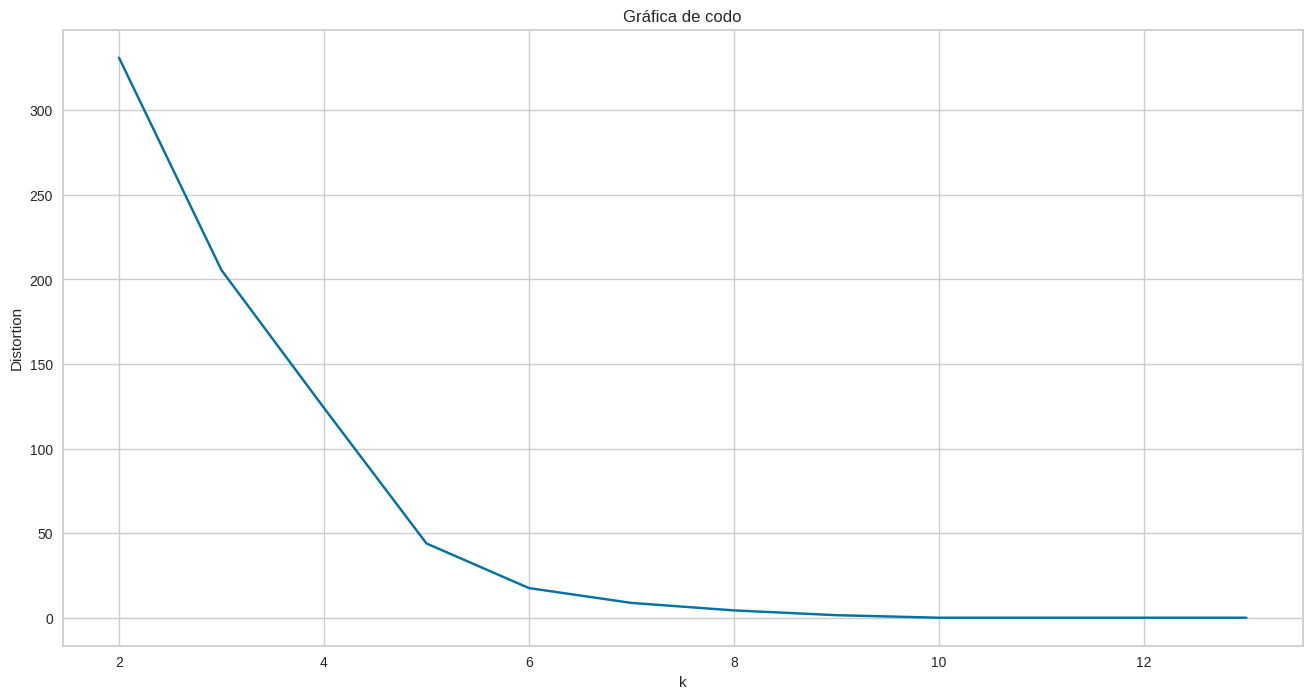

In [37]:
distortions = []
K = range(2,14)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(vectorization_matrix)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("Gráfica de codo")
plt.show()

In [55]:
km = KMeans(n_clusters=10, random_state=42).fit(vectorization_matrix)
prediction = km.predict(vectorization_matrix)


pd.value_counts(prediction).rename_axis('Cluster').to_frame('counts')

/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,counts
Cluster,
1,27
4,21
2,17
6,13
0,6
5,3
3,3
7,2
8,2


In [56]:
prediction = pd.DataFrame(prediction, columns=["cluster"])

In [57]:
new_df = df.copy()
new_df['cluster'] = prediction
new_df

,names,descriptions,cluster
0,785003A405BC7A4EBCBB21DDB757BF3F,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
1,GBV66_8F259BB36E00D124963CFA9B86F502E,Sections:\nb'.text\x00\x00\x00' Section addres...,2
2,1F2EB7B090018D975E6D9B40868C94CA,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,4
3,HJGQDD892986B2249B5214639ECC8AC0223,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
4,33DE5067A433A6EC5C328067DC18EC37,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,6
...,...,...,...
90,TG78Z__727A6800991EEAD454E53E8AF164A99C_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,7
91,QW2_4C6BDDCCA2695D6202DF38708E14FC7E_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,8
92,650A6FCA433EE243391E4B4C11F09438_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
93,785003A405BC7A4EBCBB21DDB757BF3F_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 2 clusters: 0.645
Silhouetter Score para 3 clusters: 0.719
Silhouetter Score para 4 clusters: 0.767
Silhouetter Score para 5 clusters: 0.840


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 6 clusters: 0.901


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 7 clusters: 0.975


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 8 clusters: 0.963


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 9 clusters: 0.981


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 10 clusters: 0.989


/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gabriel/.local/lib/python3.10/site-packages/yellowbrick/cluster/silhouette.py:138: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (11). Possibly due to duplicate points in X.
  self.estimator.fit(X, y, **kwargs)
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 11 clusters: 0.989


/home/gabriel/.local/lib/python3.10/site-packages/yellowbrick/cluster/silhouette.py:138: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (12). Possibly due to duplicate points in X.
  self.estimator.fit(X, y, **kwargs)
/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouetter Score para 12 clusters: 0.989


/home/gabriel/.local/lib/python3.10/site-packages/yellowbrick/cluster/silhouette.py:138: ConvergenceWarning: Number of distinct clusters (10) found smaller than n_clusters (13). Possibly due to duplicate points in X.
  self.estimator.fit(X, y, **kwargs)


Silhouetter Score para 13 clusters: 0.989


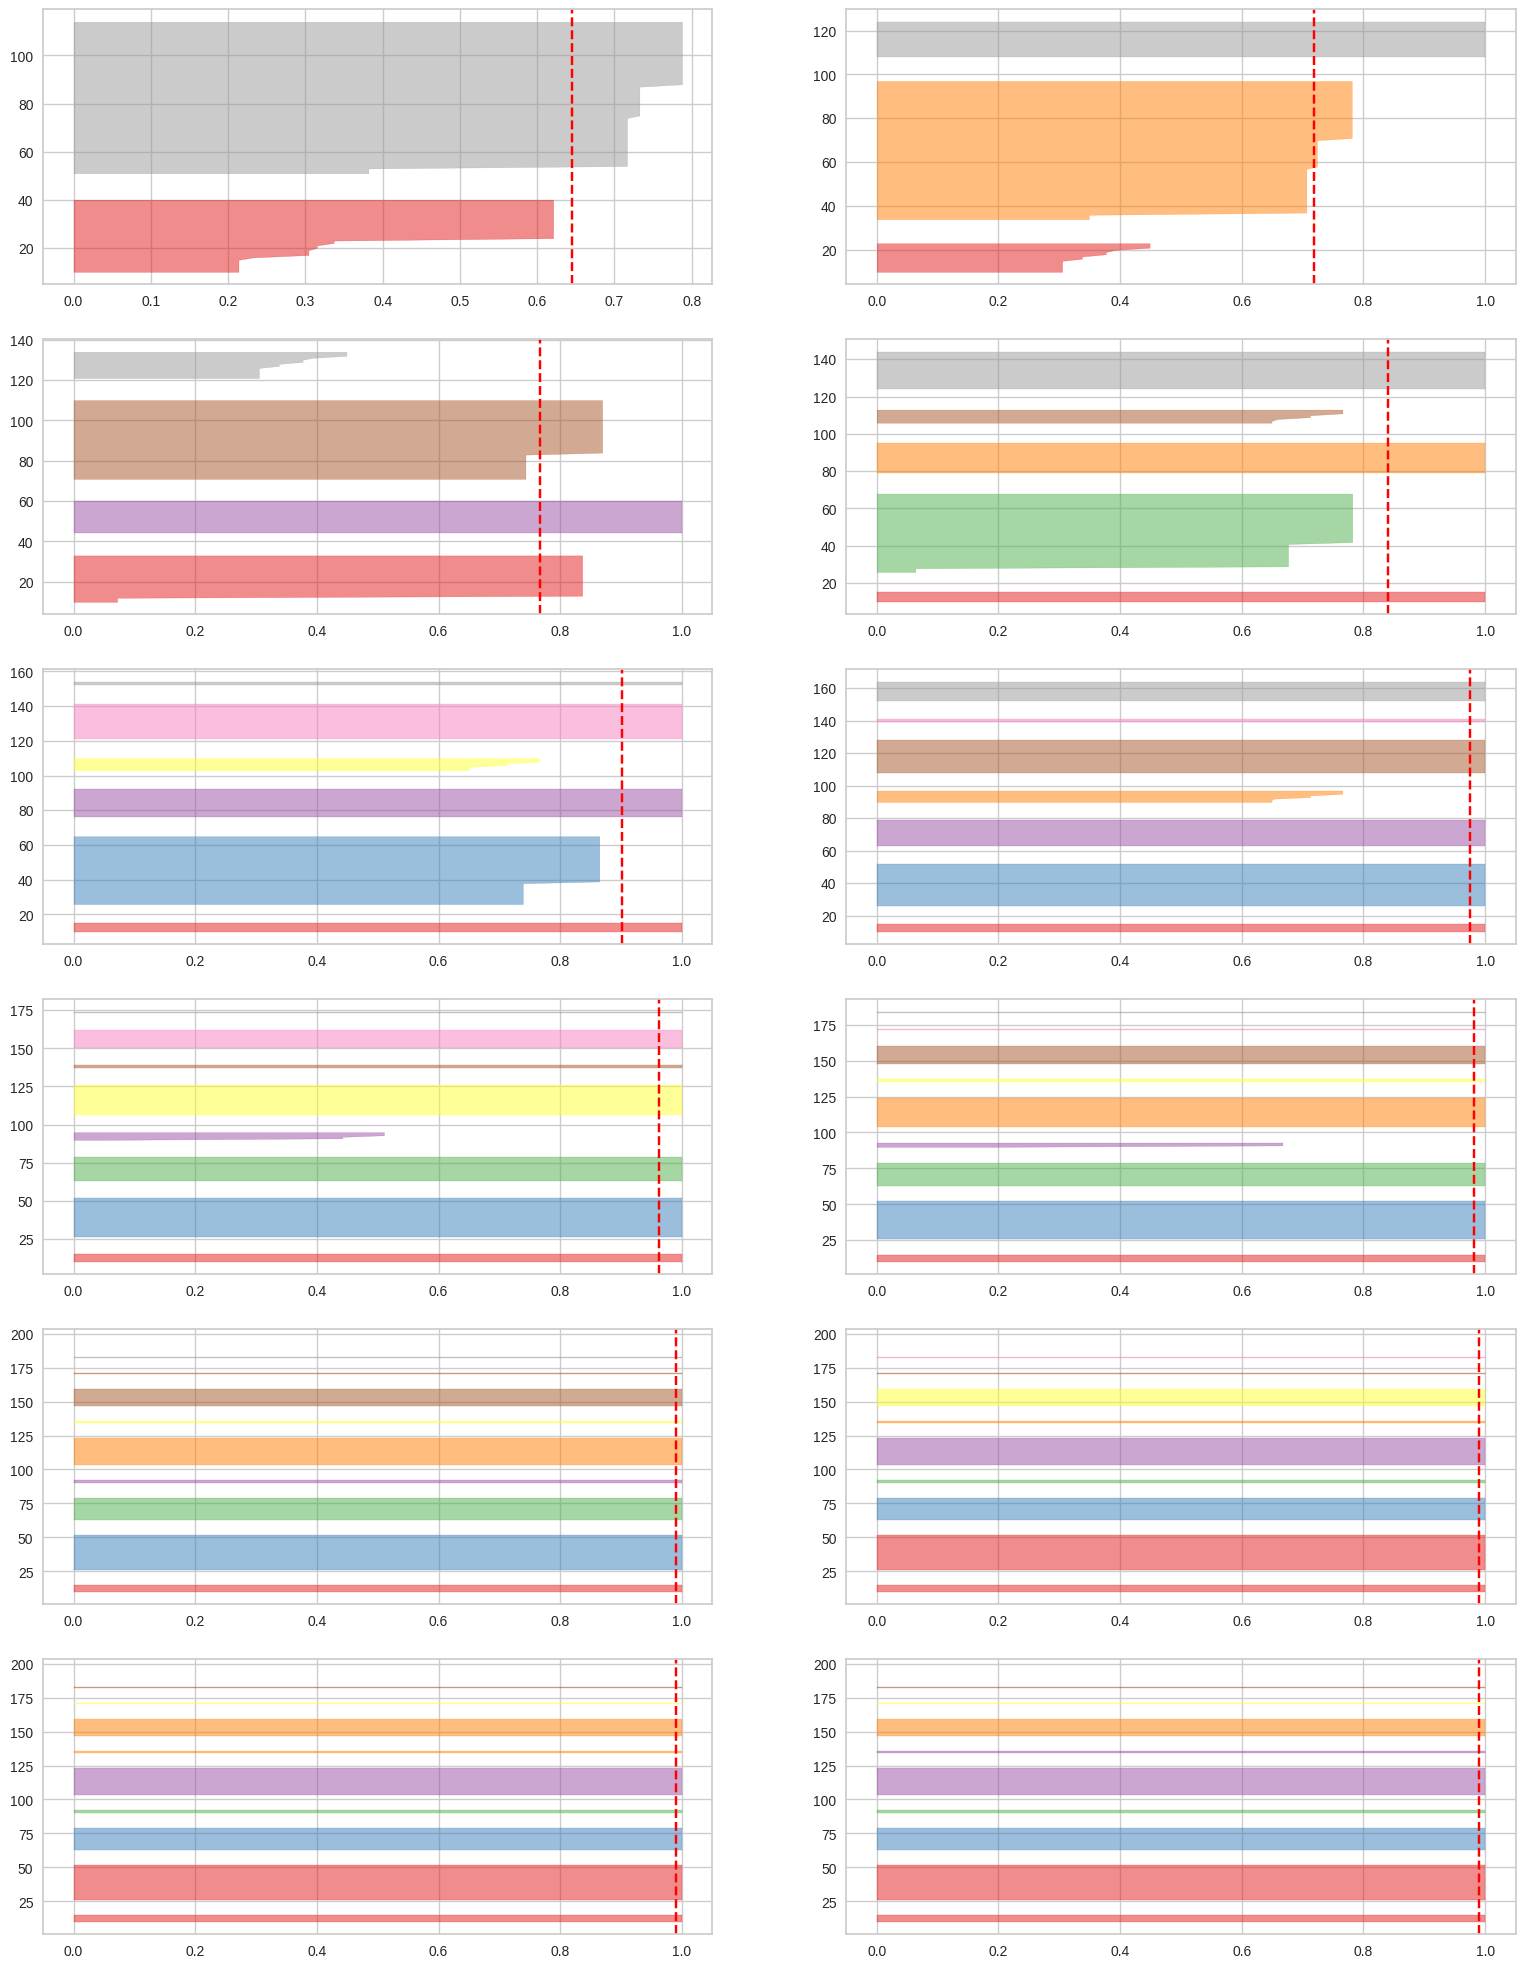

In [43]:

fig, ax = plt.subplots(6, 2, figsize=(19,25))

for i in range(2,14):
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, ax=ax[q-1][mod])
    visualizer.fit(vectorization_matrix)

    score = silhouette_score(vectorization_matrix, km.labels_)
    #
    # Print the score
    #
    print('Silhouetter Score para %s clusters: %.3f' % (str(i), score))

In [44]:
km = KMeans(n_clusters=10, random_state=42).fit(vectorization_matrix)
prediction = km.predict(vectorization_matrix)


pd.value_counts(prediction).rename_axis('Cluster').to_frame('counts')

/home/gabriel/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,counts
Cluster,
1,27
4,21
2,17
6,13
0,6
5,3
3,3
7,2
8,2


In [45]:
prediction = pd.DataFrame(prediction, columns=["cluster"])

In [46]:
new_df = df.copy()
new_df['cluster'] = prediction

new_df

,names,descriptions,cluster
0,785003A405BC7A4EBCBB21DDB757BF3F,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
1,GBV66_8F259BB36E00D124963CFA9B86F502E,Sections:\nb'.text\x00\x00\x00' Section addres...,2
2,1F2EB7B090018D975E6D9B40868C94CA,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,4
3,HJGQDD892986B2249B5214639ECC8AC0223,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
4,33DE5067A433A6EC5C328067DC18EC37,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,6
...,...,...,...
90,TG78Z__727A6800991EEAD454E53E8AF164A99C_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,7
91,QW2_4C6BDDCCA2695D6202DF38708E14FC7E_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,8
92,650A6FCA433EE243391E4B4C11F09438_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1
93,785003A405BC7A4EBCBB21DDB757BF3F_unpacked,Sections:\nb'UPX0\x00\x00\x00\x00' Section add...,1


## Indice de Jaccard

In [129]:
from sklearn.multioutput import ClassifierChain
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
import tensorflow as tf


In [123]:
y = df['descriptions']
x= df2

In [124]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=.2,
                                                    random_state=0)


In [132]:
base_lr = LogisticRegression()
ovr = OneVsRestClassifier(base_lr)
ovr.fit(X_train, Y_train)
Y_pred_ovr = ovr.predict(X_test)
ovr_jaccard_score = jaccard_score(Y_test, Y_pred_ovr, average=None)

/home/gabriel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [133]:
ovr_jaccard_score

array([0. , 0.5, 1. , 1. , 1. , 1. , 0. , 0. ])

In [134]:
len(ovr_jaccard_score)

8

1. ¿Para qué número de clústeres se obtiene el coeficiente de Silhouette más alto?
Con 10 se obtiene el coeficiente de Silhouette mas alto.
2. ¿Coincide el coeficiente de Silhouette con el método del codo?
Si coincide, en ambos es 10
3. ¿Cuántas familias existen entre los ejemplares de malware proporcionados?
10 familiass
4. ¿Coincide el índice de Jaccard con las familias encontradas?
No coincide, el indice de Jaccard tiene 8